# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Predict the salary of an individual using data about prior individuals and their qualifications

In [4]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#etc

#your info here
__author__ = "Vijay Raj Saravanan Radhakrishnan"
__email__ = "vijay_saravanan@outlook.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [6]:
#load the data into a Pandas dataframe
feature_data = pd.read_csv("data/train_features.csv")
target_data = pd.read_csv("data/train_salaries.csv")
Total_data = pd.merge(feature_data, target_data, how="inner", on="jobId")
train, test = train_test_split(Total_data, test_size = 0.2)


In [9]:
train.shape

(800000, 9)

In [10]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 572285 to 550525
Data columns (total 9 columns):
jobId                  800000 non-null object
companyId              800000 non-null object
jobType                800000 non-null object
degree                 800000 non-null object
major                  800000 non-null object
industry               800000 non-null object
yearsExperience        800000 non-null int64
milesFromMetropolis    800000 non-null int64
salary                 800000 non-null int64
dtypes: int64(3), object(6)
memory usage: 61.0+ MB


In [11]:
train.describe()

,yearsExperience,milesFromMetropolis,salary
count,800000.000000,800000.000000,800000.000000
mean,11.997916,49.530564,116.087172
std,7.213113,28.868031,38.732008
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,89.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [12]:
train.describe(include=["O"])

,jobId,companyId,jobType,degree,major,industry
count,800000,800000,800000,800000,800000,800000
unique,800000,63,8,5,9,7
top,JOB1362685230693,COMP39,SENIOR,NONE,NONE,WEB
freq,1,12975,100432,189431,425754,114498


### ---- 3 Clean the data ----

In [13]:
train.duplicated().sum()

0

In [34]:
def standard_column_names(df):
    existing_columns = list(df.columns.values)
    standardized_names = [column_name.lower() for column_name in existing_columns]
    df.columns = standardized_names
standard_column_names(train)

In [15]:
train["jobtype"] = train.jobtype.astype("category")
train["degree"] = train.degree.astype("category")
train["major"] = train.major.astype("category")
train["industry"] = train.industry.astype("category")
train["companyid"] = train.companyid.astype("category")
print(train.dtypes)

/Users/command/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/command/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/command/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

jobid                    object
companyid              category
jobtype                category
degree                 category
major                  category
industry               category
yearsexperience           int64
milesfrommetropolis       int64
salary                    int64
dtype: object


/Users/command/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
print(train.dtypes)

jobid                    object
companyid              category
jobtype                category
degree                 category
major                  category
industry               category
yearsexperience           int64
milesfrommetropolis       int64
salary                    int64
dtype: object


### ---- 4 Explore the data (EDA) ----

In [18]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
def visualize_relationship(df, feature):
    if df[feature].dtype.name == "category":
        if feature == "companyId":
            pass
        elif feature == "salary":
            plt.hist(df[feature])
            plt.xlabel("Salary")
            plt.ylabel("Frequency")
        else:
            plt.figure(figsize=(16,8))
            plt.subplot(121)
            sb.countplot(data=df, x=feature)
            plt.xlabel(feature.capitalize())
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
            
            plt.subplot(122)
            sb.boxplot(df[feature], df["salary"])
            plt.xticks(rotation = 45)
            
                         
    if df[feature].dtype.name == "int64":
        plt.figure(figsize=(16, 8))
        plt.subplot(121)
        plt.hist(df[feature])
        plt.xlabel(feature.capitalize())
        plt.ylabel("Frequency")
        
        plt.subplot(122)
        plt.scatter(df[feature], df["salary"], alpha=0.2)
        plt.xlabel(feature.capitalize())
        plt.ylabel("Salary")
        plt.title("{} vs {}".format("Salary", feature.capitalize()))

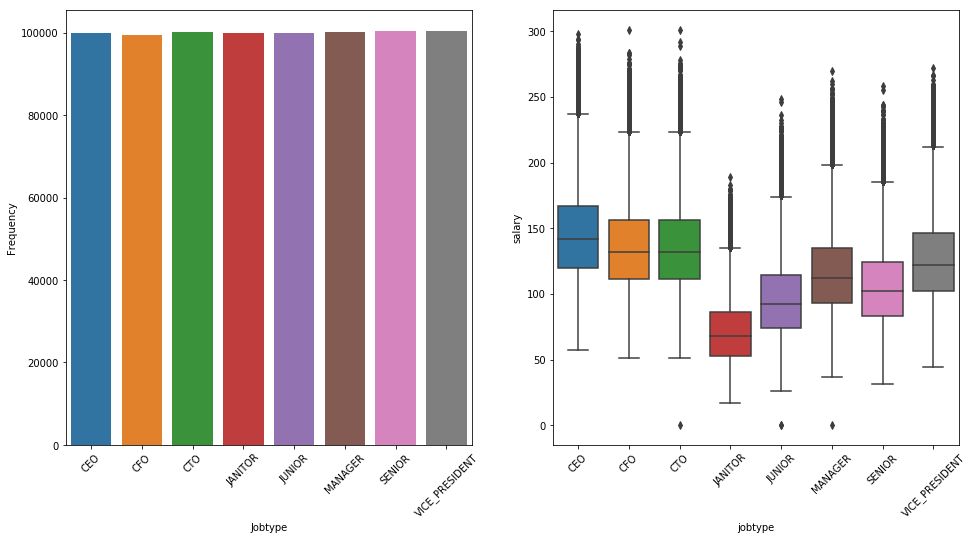

In [19]:
visualize_relationship(train, "jobtype")

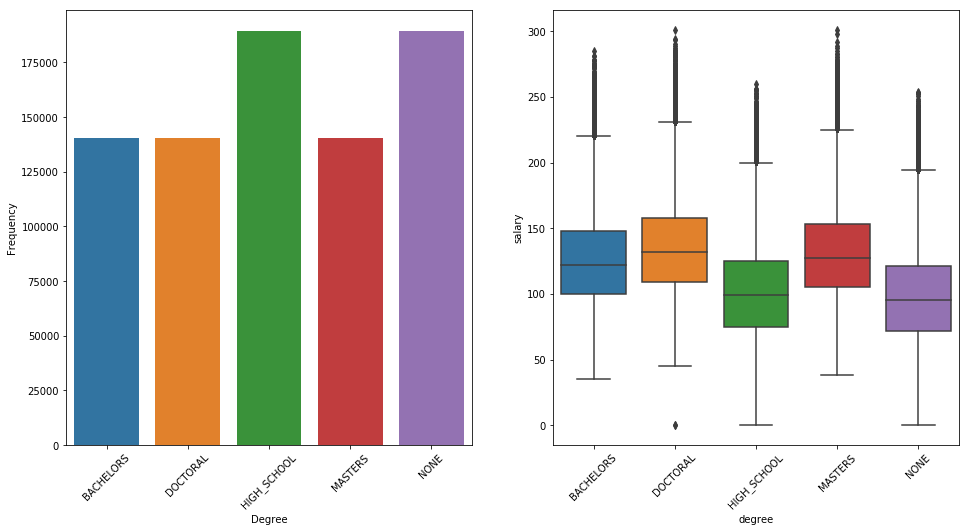

In [20]:
visualize_relationship(train, "degree")

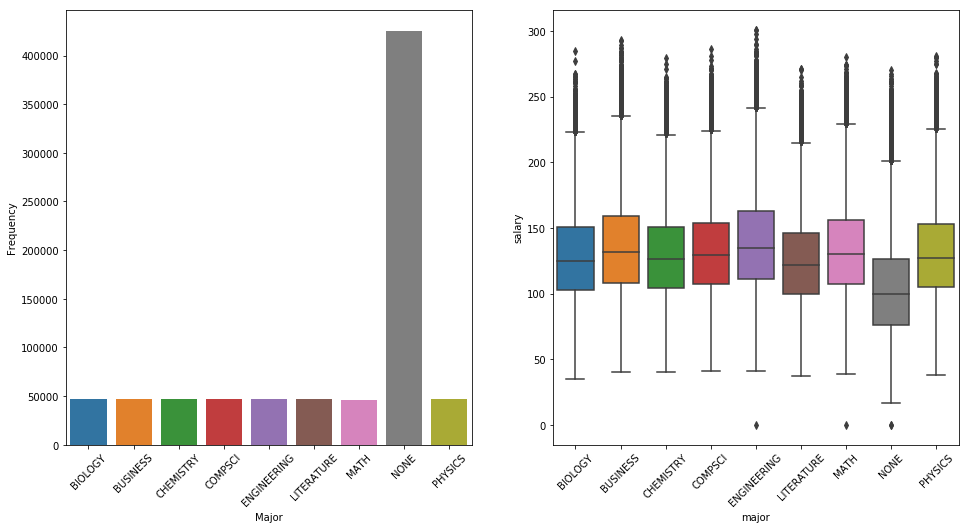

In [21]:
visualize_relationship(train, "major")

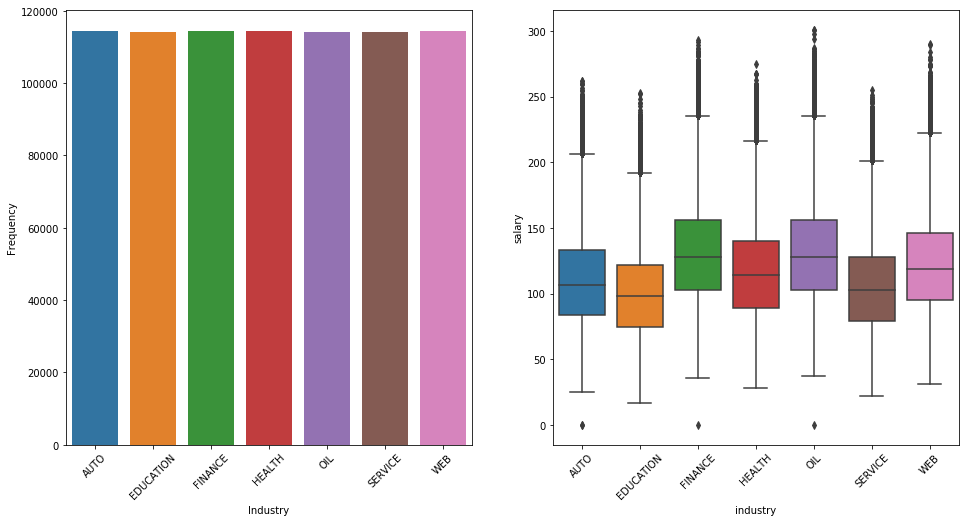

In [22]:
visualize_relationship(train, "industry")

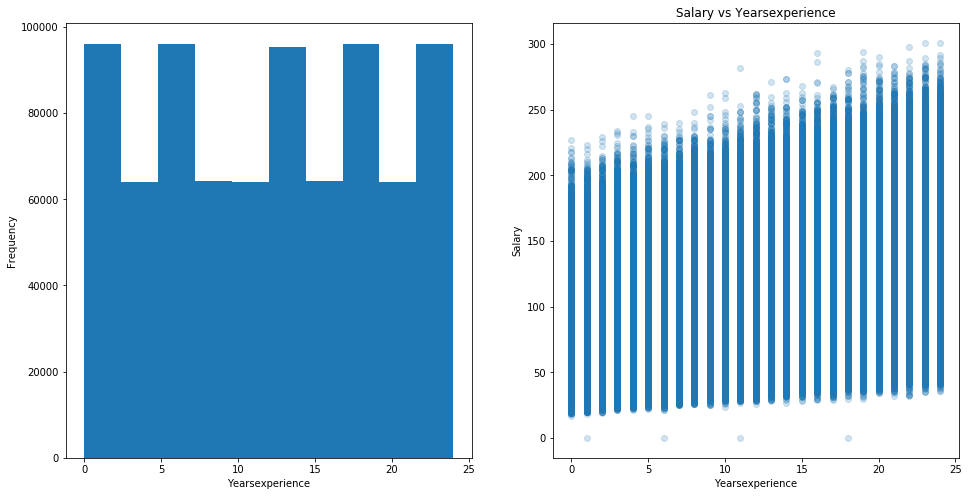

In [23]:
visualize_relationship(train, "yearsexperience")

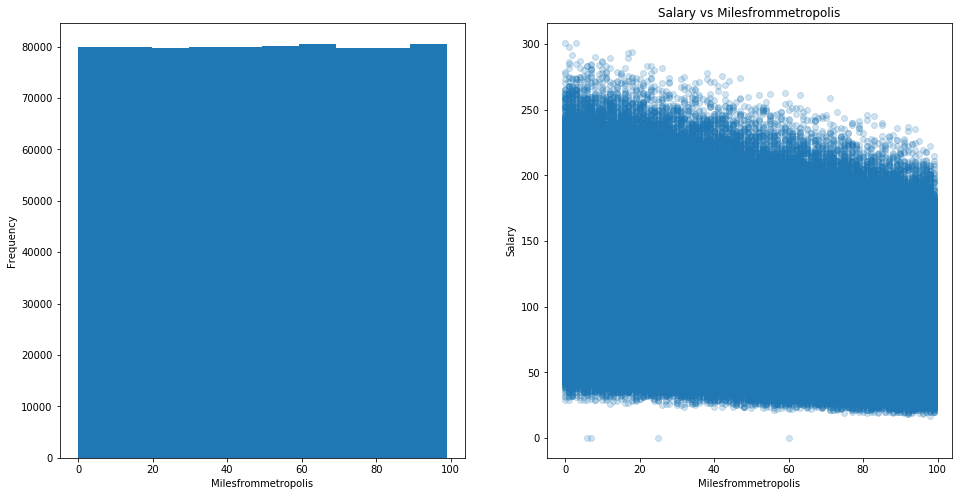

In [24]:
visualize_relationship(train, "milesfrommetropolis")

### ---- 5 Establish a baseline ----

In [26]:
categ_features = ["companyid", "jobtype", "degree", "major", "industry"]
train_categ_data = train[categ_features]
preProcessedTrain = train[["yearsexperience", "milesfrommetropolis"]]
for cat_var in categ_features:
    preProcessedTrain = pd.concat([preProcessedTrain, pd.get_dummies(train[cat_var])], axis=1)
preProcessedTrain = pd.concat([preProcessedTrain, train["salary"]], axis=1)

In [28]:
print(test.columns)

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')


In [29]:
columns = list(test.columns.values)
edited_column_names = [name.lower() for name in columns]
test.columns = edited_column_names

test_categ_data = test[categ_features]
preProcessedTest = test[["yearsexperience", "milesfrommetropolis"]]
for cat_var in categ_features:
    preProcessedTest = pd.concat([preProcessedTest, pd.get_dummies(test[cat_var])], axis=1)
preProcessedTest = pd.concat([preProcessedTest, test["salary"]], axis=1)

In [30]:
Xtrain = preProcessedTrain.iloc[:, :-1]
ytrain = preProcessedTrain.iloc[:,[-1]]
Xtest = preProcessedTest.iloc[:, :-1]
ytest = preProcessedTest.iloc[:,[-1]]

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
predicted = lin_reg.predict(Xtest)

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, predicted)
print(mse)

383.42908350085906


### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data